In [1]:
import pandas as pd
import numpy as np

import networkx as nx

In [2]:
import sklearn.linear_model
import statsmodels.api as sm
from scipy import stats
from scipy.stats import zscore
import textwrap
import matplotlib.patches as patches

In [3]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import fastcluster

In [4]:
tstats = pd.read_csv("./OLS_tissue_controlled_regressionTstats_noMCF7.csv", index_col = "Unnamed: 0")

In [5]:
columns_not = []
for item in tstats.columns:
    columns_not.append(item.split("_")[1])
    
tstats.columns = columns_not

In [6]:
tstats = tstats.drop(["STK11.1", "KEAP1.1"], axis =1)

In [28]:
palette_cmap = sns.diverging_palette(237, 8.7, s= 99, l = 50, as_cmap = True)
palette_cmap._init()

rgbas = palette_cmap._lut
hexes = [matplotlib.colors.rgb2hex(x) for x in rgbas]

In [30]:
hexes[:-1]

['#077fb1',
 '#0980b2',
 '#0b81b2',
 '#0d82b3',
 '#0e83b3',
 '#1084b4',
 '#1285b5',
 '#1486b5',
 '#1587b6',
 '#1788b6',
 '#1988b7',
 '#1b8ab8',
 '#1d8bb9',
 '#1f8cb9',
 '#218dba',
 '#228eba',
 '#248fbb',
 '#2690bc',
 '#2890bc',
 '#2991bd',
 '#2b92bd',
 '#2e94be',
 '#3095bf',
 '#3196bf',
 '#3397c0',
 '#3598c1',
 '#3798c1',
 '#3899c2',
 '#3a9ac2',
 '#3c9bc3',
 '#3e9cc4',
 '#409ec5',
 '#429fc5',
 '#44a0c6',
 '#45a0c6',
 '#47a1c7',
 '#49a2c8',
 '#4ba3c8',
 '#4ca4c9',
 '#4ea5c9',
 '#50a6ca',
 '#53a8cb',
 '#54a8cc',
 '#56a9cc',
 '#58aacd',
 '#5aabcd',
 '#5bacce',
 '#5dadcf',
 '#5faecf',
 '#61afd0',
 '#62b0d0',
 '#65b1d1',
 '#67b2d2',
 '#68b3d2',
 '#6ab4d3',
 '#6cb5d4',
 '#6eb6d4',
 '#6fb7d5',
 '#71b8d6',
 '#73b9d6',
 '#75bad7',
 '#77bbd8',
 '#79bcd8',
 '#7bbdd9',
 '#7dbed9',
 '#7ebfda',
 '#80c0db',
 '#82c1db',
 '#84c2dc',
 '#85c3dc',
 '#87c4dd',
 '#89c5de',
 '#8bc6df',
 '#8dc7df',
 '#8fc8e0',
 '#91c9e0',
 '#92cae1',
 '#94cbe2',
 '#96cce2',
 '#98cde3',
 '#99cee3',
 '#9bcfe4',
 '#9ed0e5',
 '#a

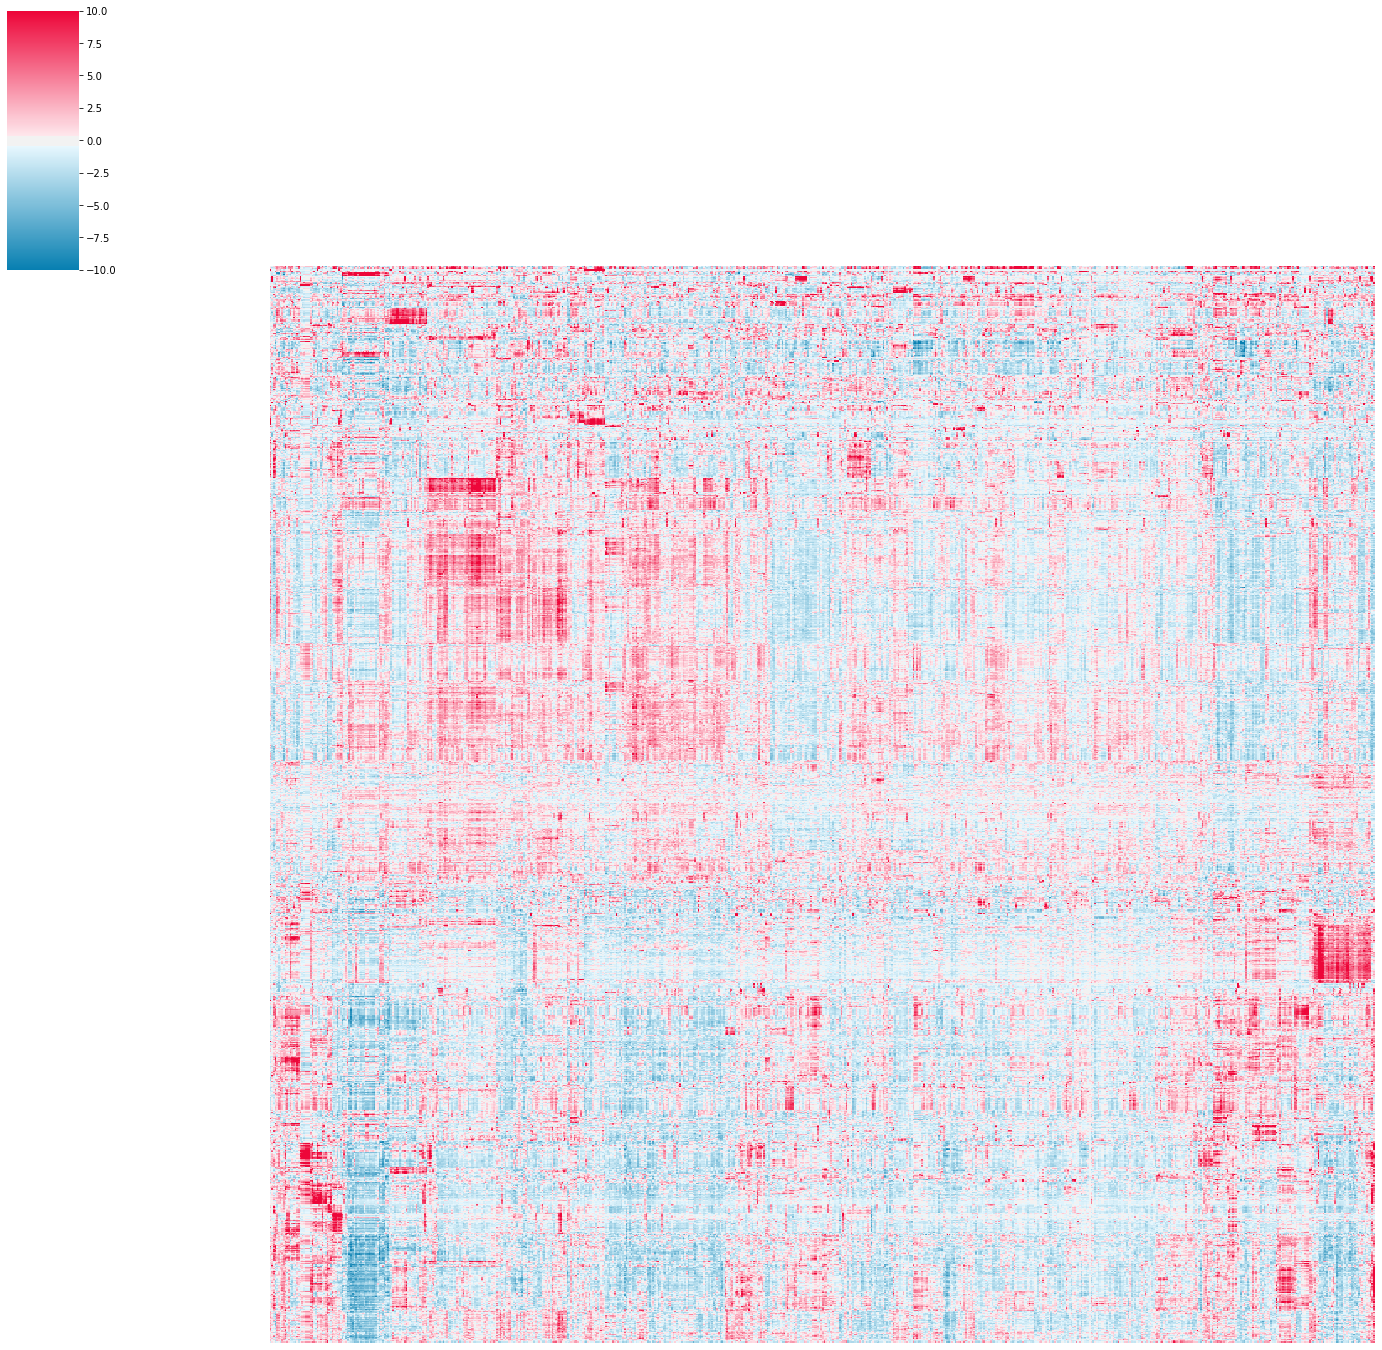

In [7]:
palette_cmap = sns.diverging_palette(237, 8.7, s= 99, l = 50, as_cmap = True)
g = sns.clustermap(tstats, cmap = palette_cmap, annot_kws={"size": 20}, yticklabels = True, xticklabels = True
                   , figsize =(20,20), vmax = 10, vmin = -10)
ax = g.ax_heatmap
ax.set_ylabel("")

xtexts = [textwrap.fill(t.get_text(), 10)  for t in g.ax_heatmap.xaxis.get_majorticklabels()]
ytexts = [textwrap.fill(t.get_text(), 10)  for t in g.ax_heatmap.yaxis.get_majorticklabels()]

g.ax_heatmap.set_xticklabels([])
g.ax_heatmap.set_xticks([])

g.ax_heatmap.set_yticklabels([])
g.ax_heatmap.set_yticks([])

g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

#plt.savefig("Clustermap_nodendrogram_noMCF7_v1.png", dpi = 450)

# get orders

In [10]:
row_order = g.dendrogram_row.reordered_ind
column_order = g.dendrogram_col.reordered_ind

In [16]:
ordered_tstats = tstats.iloc[row_order, column_order]

In [18]:
ordered_tstats

,H3F3A,NUTM2B,KDSR,MSH6,HNF1A,MAP3K1,AKAP9,DDR2,MECOM,CNBD1,...,SMAD4,NRAS,GLI1,LRIG3,SF3B1,ZEB1,DCTN1,SETD2,IGF2BP2,PPP2R1A
1053,-1.049,0.112,0.279,8.624,-1.812,-1.891,-0.004,1.433,0.775,1.444,...,10.130,6.509,6.277,1.376,11.653,0.862,0.810,1.887,2.712,0.485
816,-0.380,-0.722,1.168,2.916,4.476,2.956,3.684,4.142,2.626,8.103,...,-2.064,-2.268,5.603,-1.236,5.351,7.121,-1.854,-2.860,0.862,12.708
40,1.220,-2.600,-1.924,2.018,5.286,3.361,1.510,3.076,5.500,6.130,...,0.038,-2.895,4.238,1.358,7.218,11.633,-1.063,-0.249,-1.980,5.186
118,0.945,-1.194,-1.343,2.477,4.775,2.337,2.610,3.375,4.303,5.948,...,0.068,-1.983,4.996,0.561,7.248,12.650,-1.358,-1.140,-2.735,7.180
617,116.573,-0.588,-0.414,-0.438,2.527,1.856,-2.988,-0.496,-2.058,-0.933,...,-1.186,-1.002,-1.311,-0.892,-0.406,-0.038,0.229,-0.101,-1.004,0.339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,2.224,0.919,-2.151,-2.718,3.261,2.513,0.093,2.205,2.584,3.724,...,-2.537,0.974,2.183,-0.466,0.448,3.511,4.440,3.532,1.277,6.059
1082,0.681,2.316,-0.908,-1.599,1.461,3.061,1.514,1.131,3.734,5.689,...,-2.892,1.797,1.723,1.808,-0.931,1.152,5.379,2.019,1.001,2.820
852,2.274,-0.795,1.864,-1.937,2.014,1.217,0.868,4.579,4.049,-2.432,...,-4.005,-2.809,-1.922,-1.944,-3.755,-2.050,-6.283,-1.168,2.092,6.343
838,2.183,-0.068,0.241,-2.826,2.919,1.819,-1.175,4.167,0.841,-0.672,...,-4.024,-2.044,-0.653,0.752,-0.282,-2.308,1.916,5.068,4.058,2.134


In [17]:
ordered_tstats.to_csv("Mutation_metabolite_associations_ordered_shorthouse.csv")

## Cluster 1

In [8]:
xrange = [618,705]
yrange = [656,734]

Text(678.1249999999999, 0.5, '')

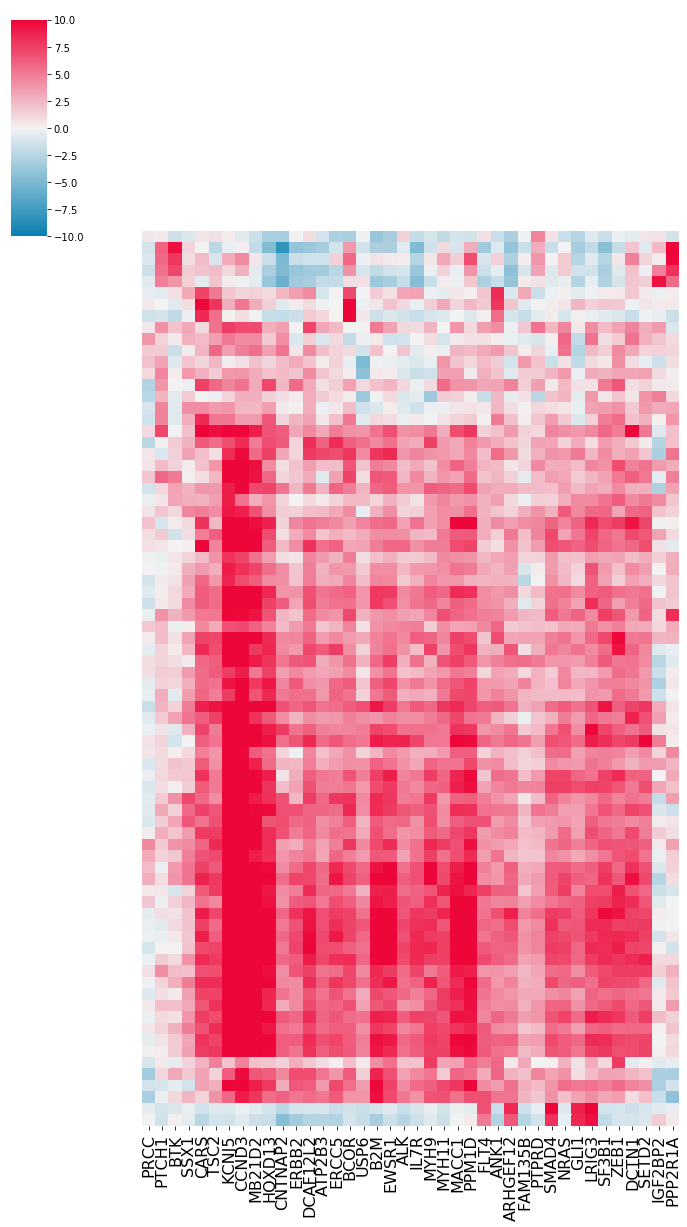

In [9]:
xlabels = xtexts[xrange[0]:xrange[1]]
ylabels = ytexts[yrange[0]:yrange[1]]

tstats.index = tstats.index.map(str)
heatmap_subset = tstats[xlabels]
heatmap_subset = heatmap_subset.loc[ylabels]

g2 = sns.clustermap(heatmap_subset, cmap = palette_cmap, annot_kws={"size": 30}, yticklabels = True, xticklabels = True
                   , figsize =(10,16.7), vmax = 10, vmin = -10, col_cluster=False, row_cluster=False)
g2.ax_heatmap.set_xticklabels(g2.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
g2.ax_heatmap.set_yticklabels([])
g2.ax_heatmap.set_yticks([])
ax = g2.ax_heatmap
ax.set_ylabel("")

#plt.savefig("Group_1_cluster_v1.pdf", bbox_inches = "tight")

## Do metabolite network

In [37]:
metabolites = pd.read_csv("../../AZ_data/Metabolite_reference_table.csv")
metabolic_levels = pd.read_csv("../MCF7_removal/Metabolomics_data_noMCF7.csv", index_col = "ionIdx")
metabolic_levels = metabolic_levels.drop("ionMz", axis =1)

In [38]:
ylabels = [int(x) for x in ylabels]
metabolites_subset = metabolites[metabolites["ionIdx"].isin(ylabels)]

In [39]:
for item in metabolites_subset["name"].tolist()[1:-2]:
    print(item)

L-Cysteine
D-Cysteine
N-Acetylputrescine
3,4-Dihydroxybenzylamine
3-Hexenedioic acid
3-Methylglutaconic acid
(E)-2-Methylglutaconic acid
trans-2-Hexenedioic acid
D-Xylose
D-Ribose
2-Deoxyribonic acid
D-Ribulose
L-Arabinose
L-Threo-2-pentulose
D-Xylulose
L-Ribulose
Beta-D-ribopyranose
Arabinofuranose
Acetaminophen
2-Phenylglycine
Dopamine quinone
Leukoaminochrome
Xanthine
Oxypurinol
6,8-Dihydroxypurine
Gentisic acid
2-Pyrocatechuic acid
Protocatechuic acid
3,5-Dihydroxyphenylbenzoic acid
Allantoin
Arabinonic acid
Ribonic acid
Hydantoin-5-propionic acid
4-Pyridoxic acid
N6-Acetyl-L-lysine
N-Alpha-acetyllysine
Glycyl-L-leucine
Oxalosuccinic acid
Diaminopimelic acid
Glucosamine
Fructosamine
Cysteine-S-sulfate
Lipoamide
Indolelactic acid
5-Methoxyindoleacetate
Cinnamoylglycine
Galactaric acid
Glucaric acid
Phosphocreatine
Topaquinone
(+)-(1R,2R)-1,2-Diphenylethane-1,2-diol
Dethiobiotin
Gamma-glutamyl-L-putrescine
5-(2'-Carboxyethyl)-4,6-Dihydroxypicolinate
Deoxyuridine
Prolylhydroxyproline


In [50]:
network_levels = metabolic_levels.loc[ylabels]
network_levels.index.name = None

In [53]:
metabolites_corr = network_levels.transpose().corr()
links = metabolites_corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
## Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (abs(links['value']) > 0.7) & (links['var1'] != links['var2']) ]
links_filtered
G0=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
d0 = G0.degree()

In [55]:
plt.rcParams['figure.figsize'] = [12,12]

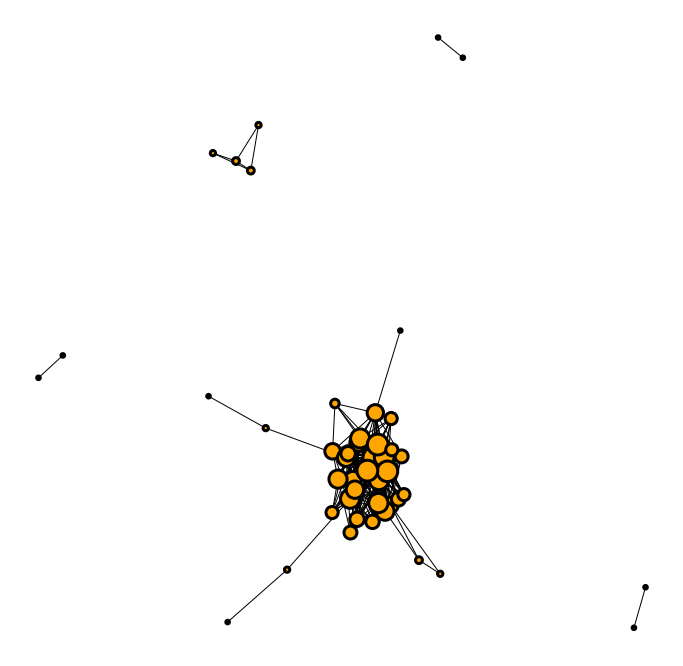

In [69]:
fig, ax = plt.subplots()
#234234
#86878
springpos = nx.spring_layout(G0, seed =234234 , iterations = 10, k=0.3*1/np.sqrt(len(G0.nodes())))
nx.draw(G0, pos = springpos, edges = True, with_labels=False, node_color='orange', edge_color='black', linewidths=3, font_size=15
        , node_size = [v * 15^2 for k, v in G0.degree()], seed = 12312, edgecolors = "k")
plt.savefig("Metabolite_network_view2.pdf")

In [57]:
G0.degree()

DegreeView({299: 3, 300: 2, 55: 3, 815: 2, 124: 1, 180: 1, 394: 1, 417: 1, 70: 2, 665: 1, 389: 24, 476: 1, 761: 18, 478: 5, 637: 16, 572: 25, 334: 27, 365: 29, 535: 2, 747: 3, 857: 16, 387: 22, 131: 11, 338: 14, 440: 21, 295: 24, 328: 18, 243: 26, 527: 20, 340: 25, 450: 28, 471: 22, 425: 20, 433: 25, 329: 29, 420: 29, 696: 13, 392: 10, 351: 11, 246: 14, 549: 10, 348: 2, 368: 1, 416: 10, 268: 10, 517: 12, 969: 1, 970: 1})

In [10]:
xtexts2 = [textwrap.fill(t.get_text(), 10)  for t in g2.ax_heatmap.xaxis.get_majorticklabels()]
ytexts2 = [textwrap.fill(t.get_text(), 10)  for t in g2.ax_heatmap.yaxis.get_majorticklabels()]
cluster1_genes = xtexts2[3:]
cluster1_metabolites = ytexts2[3:]

In [11]:
for item in cluster1_genes[1:-2]:
    print(item)

CARS
TSC2
KCNJ5
CCND3
MB21D2
HOXD13
CNTNAP2
ERBB2
DCAF12L2
ATP2B3
ERCC5
BCOR
USP6
B2M
EWSR1
ALK
IL7R
MYH9
MYH11
MACC1
PPM1D
FLT4
ANK1
ARHGEF12
FAM135B
PTPRD
SMAD4
NRAS
GLI1
LRIG3
SF3B1
ZEB1
DCTN1
SETD2


In [12]:
from gprofiler import GProfiler
gp = GProfiler(return_dataframe=True, #return pandas dataframe or plain python structures    
)

In [13]:
cluster1_results = gp.profile(organism='hsapiens',
            query=cluster1_genes[1:-2])

In [14]:
cluster1_results = cluster1_results[cluster1_results["source"].isin(["GO:BP", "KEGG", "REAC"])]

In [15]:
## Add one to KEGG results, add 2 to REACTOME results
cluster1_results.loc[cluster1_results["source"] == "KEGG", "precision"] = cluster1_results.loc[cluster1_results["source"] == "KEGG", "precision"] +1
cluster1_results.loc[cluster1_results["source"] == "REAC", "precision"] = cluster1_results.loc[cluster1_results["source"] == "REAC", "precision"] +2

In [16]:
colorpalette = [sns.color_palette("muted")[2]] + [sns.color_palette("muted")[1]] +  [sns.color_palette("muted")[0]]

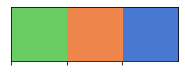

In [17]:
sns.palplot(colorpalette)

In [111]:
cluster1_results.to_csv("cluster1_genes_enrichment.csv")

In [112]:
matplotlib.rcParams['figure.figsize'] = 12, 8

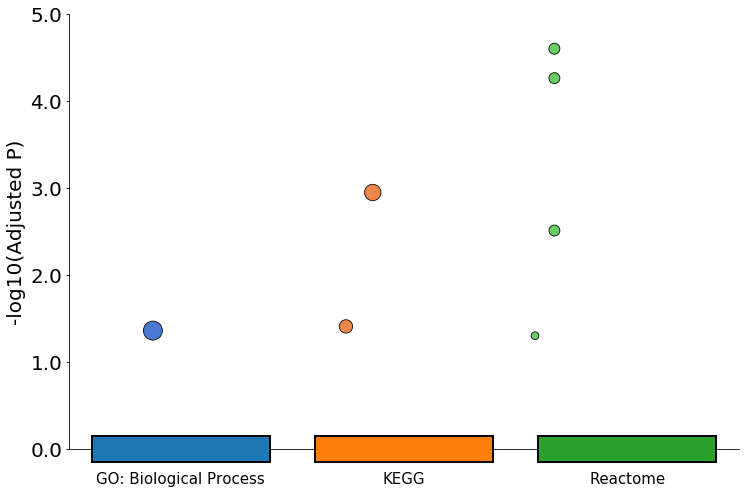

In [115]:
g = sns.scatterplot(y = -np.log10(cluster1_results["p_value"]), x = cluster1_results["precision"], hue = cluster1_results["source"],
                   s = cluster1_results["intersection_size"]* 30, edgecolor = "k", lw = 2, legend=False, palette = colorpalette)

g.set_xlim(0,3)
g.set_ylabel("-log10(Adjusted P)", size = 20)
g.set_ylim(0,5)
g.set_yticklabels(g.get_yticks(), size = 20)

g.set_xlabel("")
g.set_xticks([])


sns.despine()

rect = patches.Rectangle((0.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[0]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

rect = patches.Rectangle((1.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[1]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

rect = patches.Rectangle((2.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[2]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

g.text(0.5, -0.4, "GO: Biological Process", horizontalalignment='center', size=15, color='black')
g.text(1.5, -0.4, "KEGG", horizontalalignment='center', size=15, color='black')
g.text(2.5, -0.4, "Reactome", horizontalalignment='center', size=15, color='black')

plt.savefig("Group1_enrichment_v1.pdf", bbox_inches = "tight")

## Cluster 2

In [152]:
xrange = [44,75]
yrange = [1000,1100]

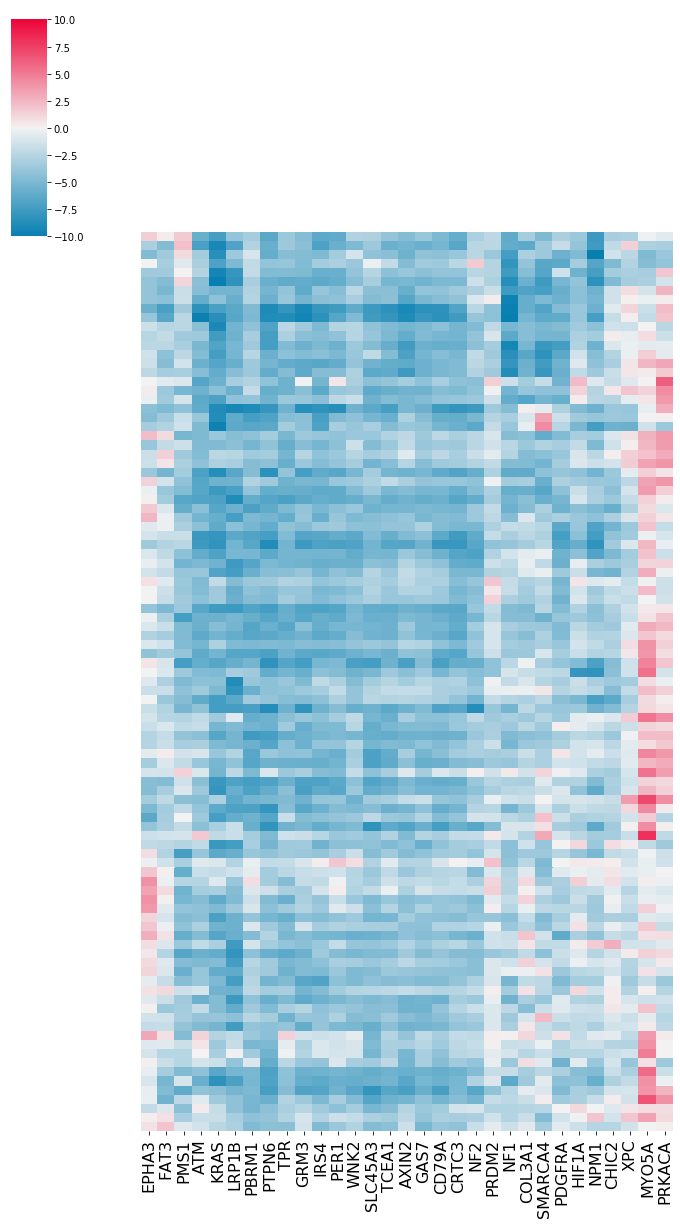

In [154]:
xlabels = xtexts[xrange[0]:xrange[1]]
ylabels = ytexts[yrange[0]:yrange[1]]

tstats.index = tstats.index.map(str)
heatmap_subset = tstats[xlabels]
heatmap_subset = heatmap_subset.loc[ylabels]

g2 = sns.clustermap(heatmap_subset, cmap = palette_cmap, annot_kws={"size": 30}, yticklabels = True, xticklabels = True
                   , figsize =(10,16.7), vmax = 10, vmin = -10, col_cluster=False, row_cluster=False)
g2.ax_heatmap.set_xticklabels(g2.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
g2.ax_heatmap.set_yticklabels([])
g2.ax_heatmap.set_yticks([])
ax = g2.ax_heatmap
ax.set_ylabel("")

plt.savefig("Group_2_cluster_v1.pdf")

In [155]:
xtexts2 = [textwrap.fill(t.get_text(), 10)  for t in g2.ax_heatmap.xaxis.get_majorticklabels()]
ytexts2 = [textwrap.fill(t.get_text(), 10)  for t in g2.ax_heatmap.yaxis.get_majorticklabels()]
cluster2_genes = xtexts2[3:]
cluster2_metabolites = ytexts2[3:]

In [164]:
cluster2_results = gp.profile(organism='hsapiens',
            query=cluster2_genes[1:-2])

cluster2_results = cluster2_results[cluster2_results["source"].isin(["GO:BP", "KEGG", "REAC"])]

## Add one to KEGG results, add 2 to REACTOME results
cluster2_results.loc[cluster2_results["source"] == "KEGG", "precision"] = cluster2_results.loc[cluster2_results["source"] == "KEGG", "precision"] +1
cluster2_results.loc[cluster2_results["source"] == "REAC", "precision"] = cluster2_results.loc[cluster2_results["source"] == "REAC", "precision"] +2

In [165]:
cluster2_results.to_csv("cluster2_genes_enrichment.csv")

In [171]:
colorpalette = [sns.color_palette("muted")[0]] +  [sns.color_palette("muted")[1]]

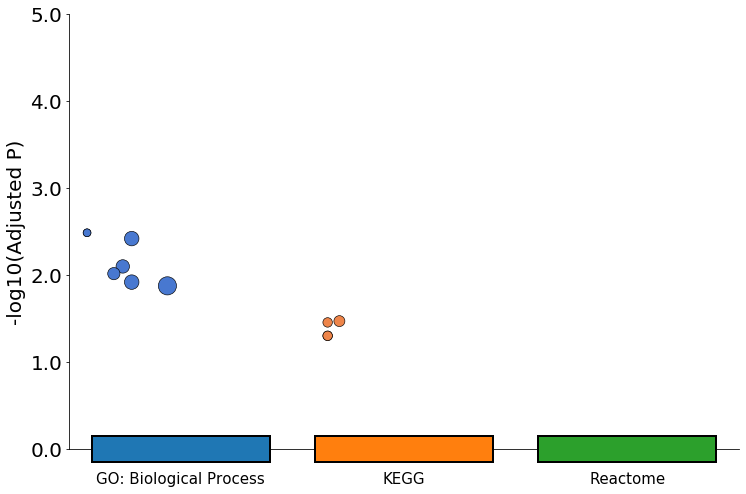

In [173]:
g = sns.scatterplot(y = -np.log10(cluster2_results["p_value"]), x = cluster2_results["precision"], hue = cluster2_results["source"],
                   s = cluster2_results["intersection_size"]* 30, edgecolor = "k", lw = 2, legend=False, palette = colorpalette)

g.set_xlim(0,3)
g.set_ylabel("-log10(Adjusted P)", size = 20)
g.set_ylim(0,5)
g.set_yticklabels(g.get_yticks(), size = 20)

g.set_xlabel("")
g.set_xticks([])


sns.despine()

rect = patches.Rectangle((0.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[0]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

rect = patches.Rectangle((1.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[1]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

rect = patches.Rectangle((2.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[2]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

g.text(0.5, -0.4, "GO: Biological Process", horizontalalignment='center', size=15, color='black')
g.text(1.5, -0.4, "KEGG", horizontalalignment='center', size=15, color='black')
g.text(2.5, -0.4, "Reactome", horizontalalignment='center', size=15, color='black')

plt.savefig("Group2_enrichment_v1.pdf", bbox_inches = "tight")

In [174]:
cluster2_results

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
5,GO:BP,GO:0021896,forebrain astrocyte differentiation,0.003264,True,"""The process in which a relatively unspecializ...",2,25,2,18117,0.080000,1.000000,query_1,"[GO:0030900, GO:0048708]"
6,GO:BP,GO:0021897,forebrain astrocyte development,0.003264,True,"""The process aimed at the progression of an as...",2,25,2,18117,0.080000,1.000000,query_1,"[GO:0014002, GO:0021896]"
7,GO:BP,GO:0009314,response to radiation,0.003808,True,"""Any process that results in a change in state...",461,25,7,18117,0.280000,0.015184,query_1,[GO:0009628]
10,GO:BP,GO:0009416,response to light stimulus,0.007957,True,"""Any process that results in a change in state...",328,25,6,18117,0.240000,0.018293,query_1,[GO:0009314]
12,GO:BP,GO:0043409,negative regulation of MAPK cascade,0.009629,True,"""Any process that stops, prevents, or reduces ...",190,25,5,18117,0.200000,0.026316,query_1,"[GO:0000165, GO:0043408, GO:1902532]"
13,GO:BP,GO:1902532,negative regulation of intracellular signal tr...,0.012055,True,"""Any process that stops, prevents or reduces t...",549,25,7,18117,0.280000,0.012750,query_1,"[GO:0009968, GO:0035556, GO:1902531]"
14,GO:BP,GO:0048585,negative regulation of response to stimulus,0.013307,True,"""Any process that stops, prevents, or reduces ...",1733,25,11,18117,0.440000,0.006347,query_1,"[GO:0048519, GO:0048583, GO:0050896]"
28,KEGG,KEGG:05225,Hepatocellular carcinoma,0.033850,True,Hepatocellular carcinoma,166,19,4,8001,1.210526,0.024096,query_1,[KEGG:00000]
29,KEGG,KEGG:05230,Central carbon metabolism in cancer,0.035044,True,Central carbon metabolism in cancer,70,19,3,8001,1.157895,0.042857,query_1,[KEGG:00000]
35,KEGG,KEGG:01521,EGFR tyrosine kinase inhibitor resistance,0.049947,True,EGFR tyrosine kinase inhibitor resistance,79,19,3,8001,1.157895,0.037975,query_1,[KEGG:00000]


## Cluster 3

In [208]:
xrange = [94,136]
yrange = [215,500]

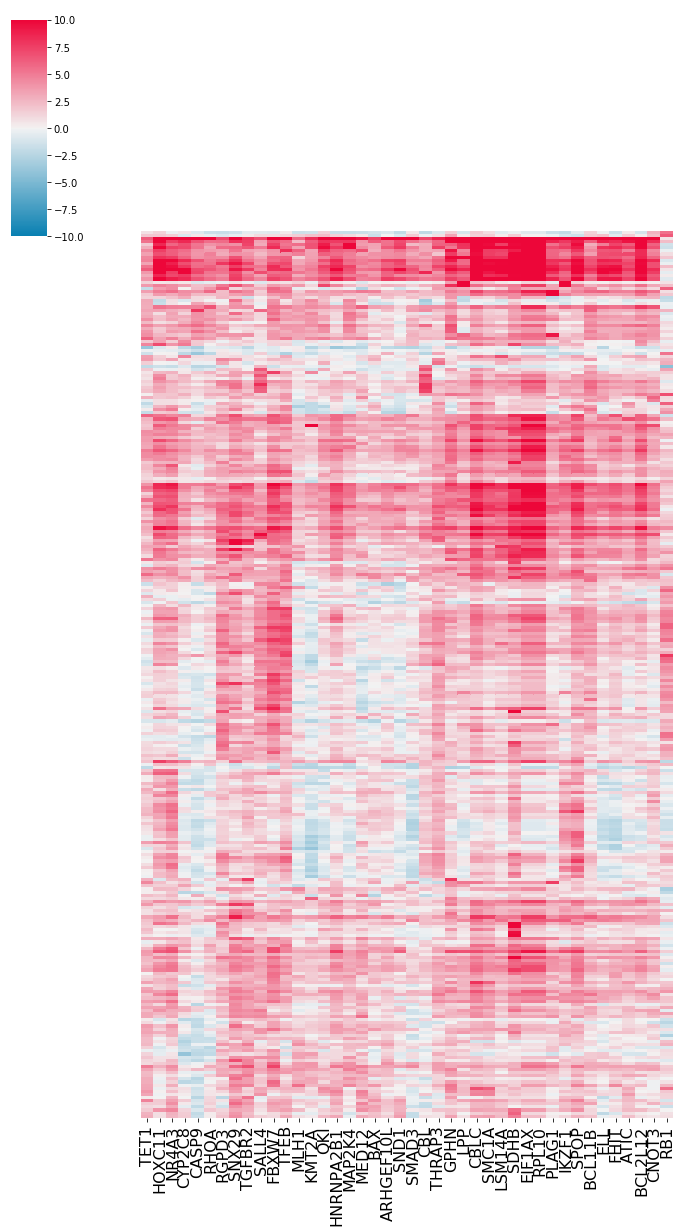

In [210]:
xlabels = xtexts[xrange[0]:xrange[1]]
ylabels = ytexts[yrange[0]:yrange[1]]

tstats.index = tstats.index.map(str)
heatmap_subset = tstats[xlabels]
heatmap_subset = heatmap_subset.loc[ylabels]

g2 = sns.clustermap(heatmap_subset, cmap = palette_cmap, annot_kws={"size": 30}, yticklabels = True, xticklabels = True
                   , figsize =(10,16.7), vmax = 10, vmin = -10, col_cluster=False, row_cluster=False)
g2.ax_heatmap.set_xticklabels(g2.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
g2.ax_heatmap.set_yticklabels([])
g2.ax_heatmap.set_yticks([])
ax = g2.ax_heatmap
ax.set_ylabel("")

plt.savefig("Group_3_cluster_v1.pdf")

In [211]:
xtexts3 = [textwrap.fill(t.get_text(), 10)  for t in g2.ax_heatmap.xaxis.get_majorticklabels()]
ytexts3 = [textwrap.fill(t.get_text(), 10)  for t in g2.ax_heatmap.yaxis.get_majorticklabels()]
cluster3_genes = xtexts3[3:]
cluster3_metabolites = ytexts3[3:]

In [212]:
cluster3_results = gp.profile(organism='hsapiens',
            query=cluster3_genes[1:-2])

cluster3_results = cluster3_results[cluster3_results["source"].isin(["GO:BP", "KEGG", "REAC"])]

## Add one to KEGG results, add 2 to REACTOME results
cluster3_results.loc[cluster3_results["source"] == "KEGG", "precision"] = cluster3_results.loc[cluster3_results["source"] == "KEGG", "precision"] +1
cluster3_results.loc[cluster3_results["source"] == "REAC", "precision"] = cluster3_results.loc[cluster3_results["source"] == "REAC", "precision"] +2

In [213]:
cluster3_results.to_csv("cluster3_genes_enrichment.csv")

Text(2.5, -0.4, 'Reactome')

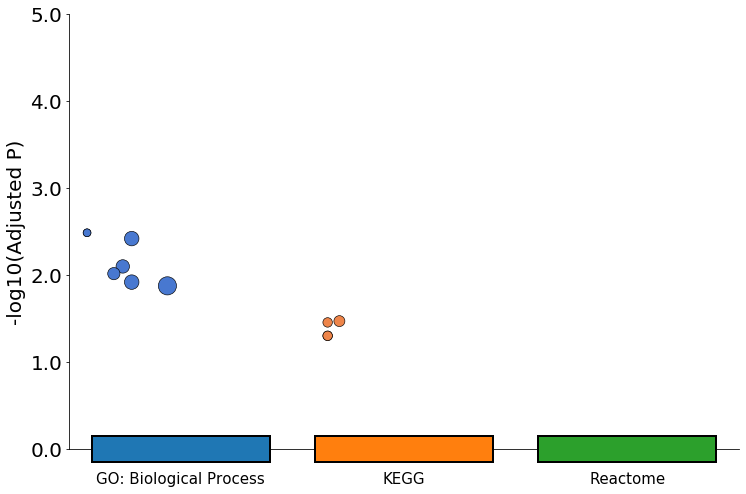

In [214]:
g = sns.scatterplot(y = -np.log10(cluster2_results["p_value"]), x = cluster2_results["precision"], hue = cluster2_results["source"],
                   s = cluster2_results["intersection_size"]* 30, edgecolor = "k", lw = 2, legend=False, palette = colorpalette)

g.set_xlim(0,3)
g.set_ylabel("-log10(Adjusted P)", size = 20)
g.set_ylim(0,5)
g.set_yticklabels(g.get_yticks(), size = 20)

g.set_xlabel("")
g.set_xticks([])


sns.despine()

rect = patches.Rectangle((0.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[0]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

rect = patches.Rectangle((1.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[1]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

rect = patches.Rectangle((2.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[2]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

g.text(0.5, -0.4, "GO: Biological Process", horizontalalignment='center', size=15, color='black')
g.text(1.5, -0.4, "KEGG", horizontalalignment='center', size=15, color='black')
g.text(2.5, -0.4, "Reactome", horizontalalignment='center', size=15, color='black')

In [215]:
cluster3_results

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,KEGG,KEGG:05210,Colorectal cancer,0.000009,True,Colorectal cancer,86,24,6,8001,1.250000,0.069767,query_1,[KEGG:00000]
2,GO:BP,GO:0051171,regulation of nitrogen compound metabolic process,0.000123,True,"""Any process that modulates the frequency, rat...",5848,35,27,18117,0.771429,0.004617,query_1,"[GO:0006807, GO:0019222]"
3,GO:BP,GO:0043525,positive regulation of neuron apoptotic process,0.000178,True,"""Any process that activates or increases the f...",59,35,5,18117,0.142857,0.084746,query_1,"[GO:0043065, GO:0043523, GO:0051402, GO:1901216]"
4,GO:BP,GO:0080090,regulation of primary metabolic process,0.000276,True,"""Any process that modulates the frequency, rat...",6053,35,27,18117,0.771429,0.004461,query_1,"[GO:0019222, GO:0044238]"
9,GO:BP,GO:0060255,regulation of macromolecule metabolic process,0.002045,True,"""Any process that modulates the frequency, rat...",6603,35,27,18117,0.771429,0.004089,query_1,"[GO:0019222, GO:0043170]"
10,GO:BP,GO:1901216,positive regulation of neuron death,0.002294,True,"""Any process that activates or increases the f...",98,35,5,18117,0.142857,0.051020,query_1,"[GO:0010942, GO:0070997, GO:1901214]"
13,GO:BP,GO:0044260,cellular macromolecule metabolic process,0.002944,True,"""The chemical reactions and pathways involving...",8390,35,30,18117,0.857143,0.003576,query_1,"[GO:0043170, GO:0044237]"
14,GO:BP,GO:0031323,regulation of cellular metabolic process,0.003644,True,"""Any process that modulates the frequency, rat...",6269,35,26,18117,0.742857,0.004147,query_1,"[GO:0019222, GO:0044237, GO:0050794]"
16,KEGG,KEGG:05212,Pancreatic cancer,0.004328,True,Pancreatic cancer,76,24,4,8001,1.166667,0.052632,query_1,[KEGG:00000]
17,KEGG,KEGG:05220,Chronic myeloid leukemia,0.004328,True,Chronic myeloid leukemia,76,24,4,8001,1.166667,0.052632,query_1,[KEGG:00000]
